<a href="https://colab.research.google.com/github/Arush0113/EEG_Pipeline-IITR/blob/main/Copy_of_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
hidden_dim = 256
num_of_classes = 3
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [ ]:
pip install attention

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, InputLayer
import numpy as np
from attention import Attention
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
data  = pd.read_csv("/content/drive/My Drive/Emotion_Classification/emotions.csv")                      

In [ ]:
type(data)

pandas.core.frame.DataFrame

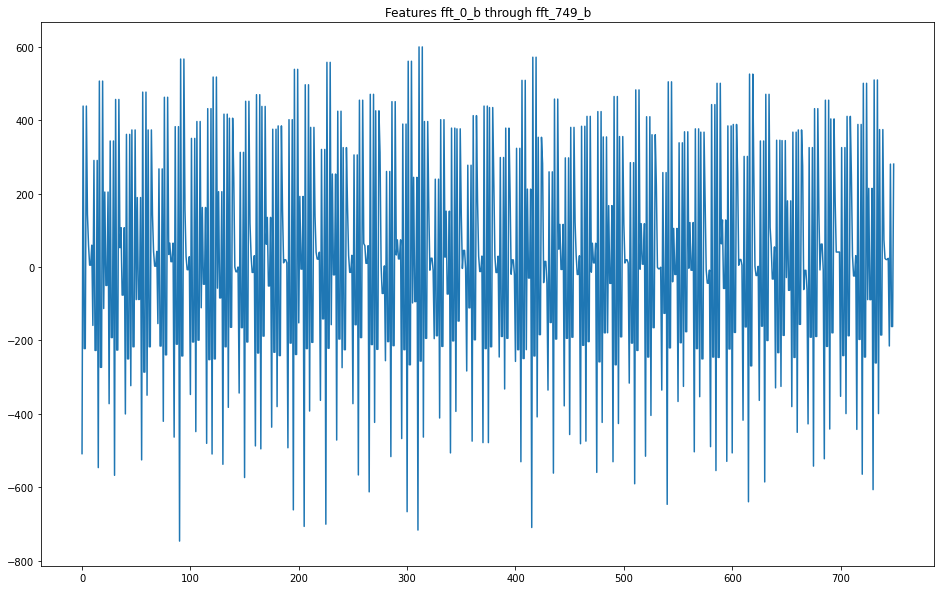

In [ ]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
data['label'].value_counts()

NEUTRAL     716
POSITIVE    708
NEGATIVE    708
Name: label, dtype: int64

DATA PREPROCESSING

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train.shape
X_test.shape

(640, 2548)

In [ ]:
X_train = tensorflow.expand_dims(X_train, axis=2)

In [ ]:
X_train.shape

TensorShape([1492, 2548, 1])

#MODEL ARCHITECTURE

Gated Recurrent Unit(GRU)

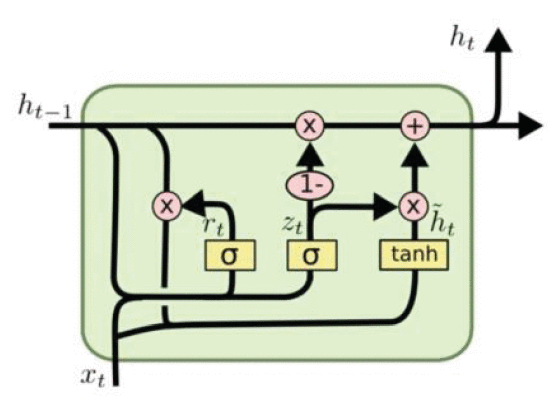

Bidirectional GRU

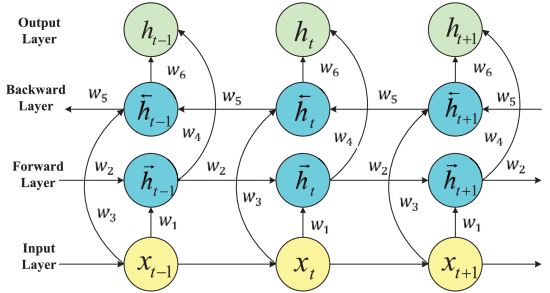

##Attention

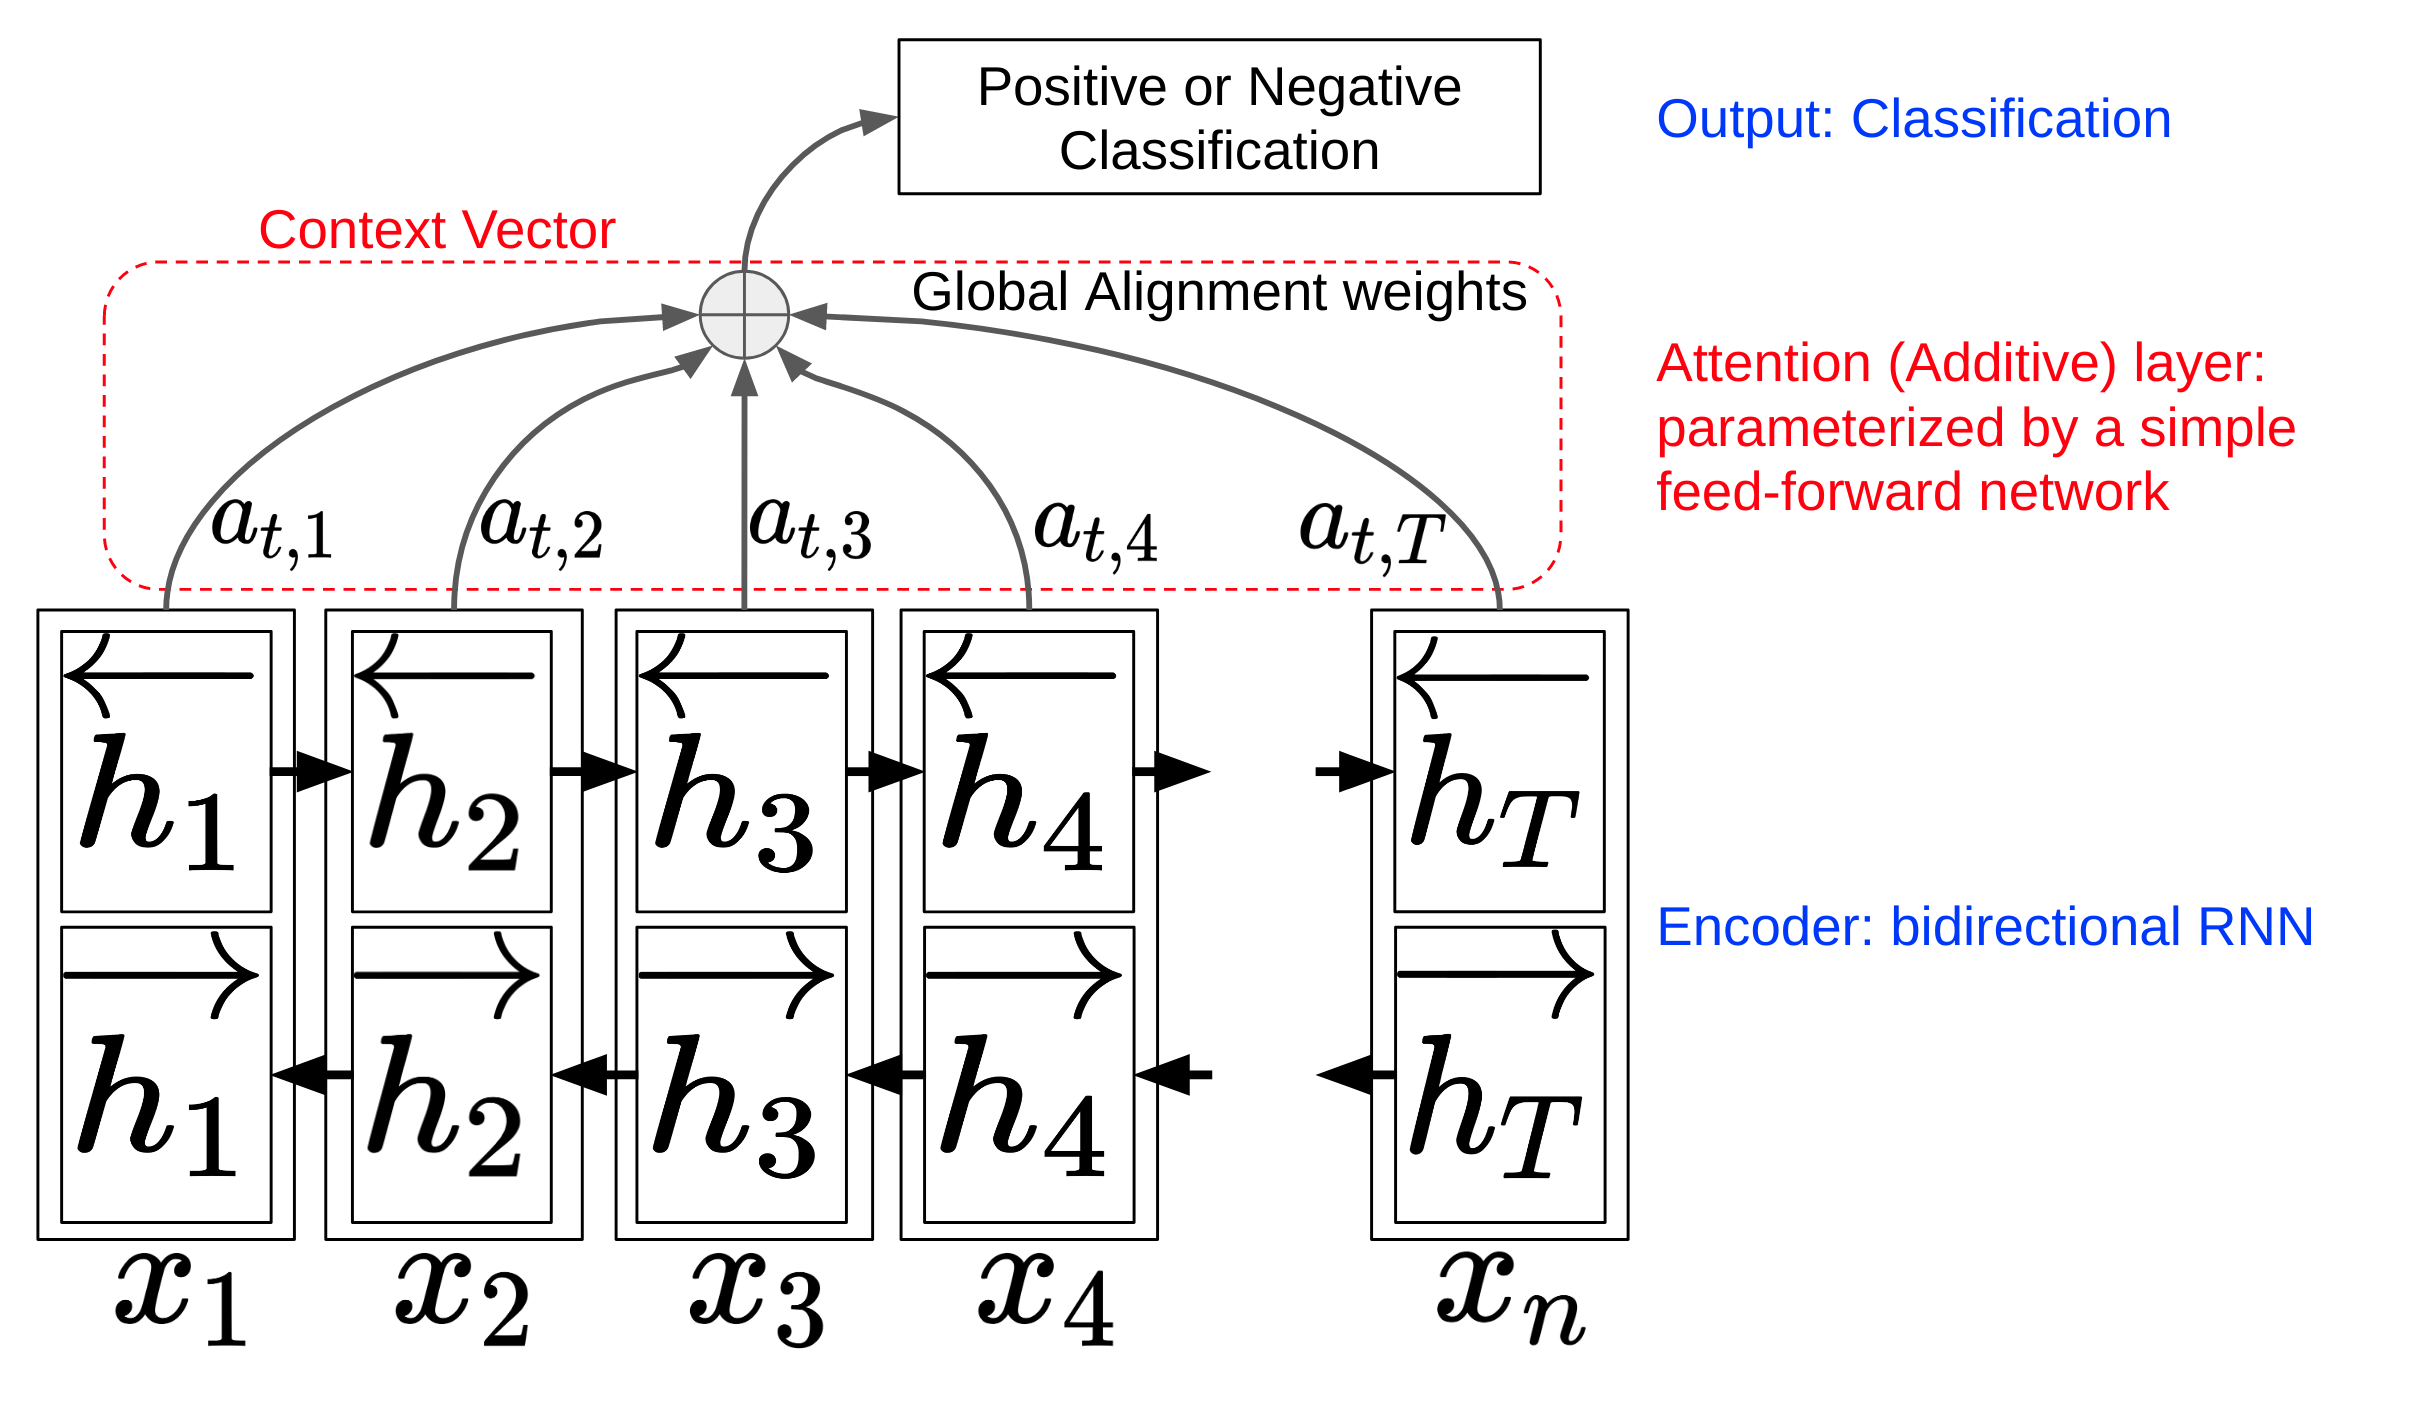

In [ ]:
model = Sequential()

In [ ]:
model.add(InputLayer(input_shape = (X_train.shape[1], 1)))
model.add(Bidirectional(GRU(hidden_dim, return_sequences=True), merge_mode = 'concat'))
model.add(Dense(hidden_dim, activation = 'tanh'))
model.add(Attention())
model.add(Dense(num_of_classes, activation = 'softmax'))

In [ ]:
for layer in model.layers:
  print(layer.output.shape)

(None, 2548, 1)
(None, 2548, 512)
(None, 2548, 256)
(None, 256)
(None, 2548, 256)
(None, 2548)
(None, 2548)
(None, 256)
(None, 512)
(None, 128)
(None, 3)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
bidirectional (Bidirectional (None, 2548, 512)         397824    
_________________________________________________________________
dense (Dense)                (None, 2548, 256)         131328    
_________________________________________________________________
last_hidden_state (Lambda)   (None, 256)               0         
_________________________________________________________________
attention_score_vec (Dense)  (None, 2548, 256)         65536     
_________________________________________________________________
attention_score (Dot)        (None, 2548)              0         
_________________________________________________________________
attention_weight (Activation (None, 2548)              0

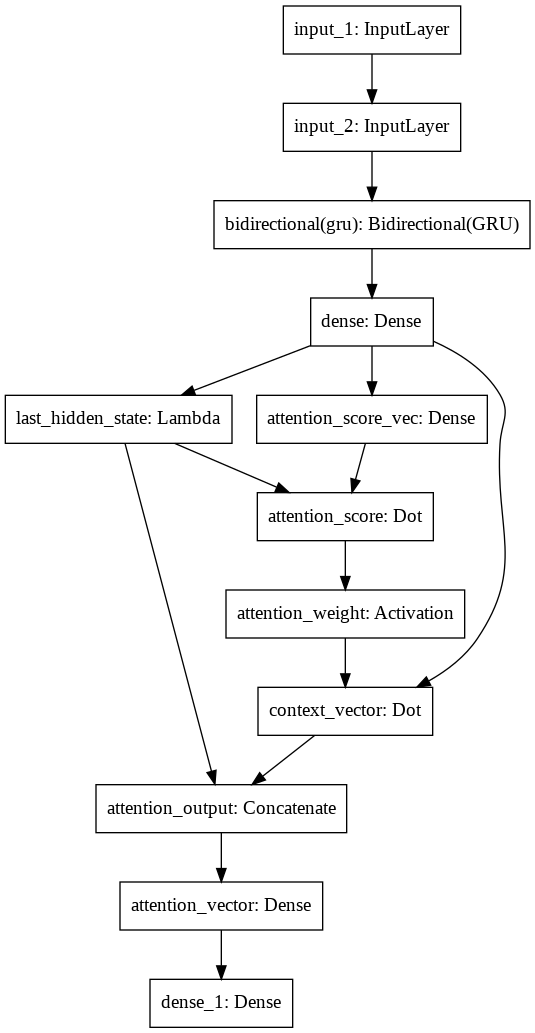

In [ ]:
plot_model(model, to_file = 'model.png')

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('D:\Anmol', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=50, callbacks = checkpoint)

Epoch 1/50
38/38 [==============================] - 20s 279ms/step - loss: 0.7379 - accuracy: 0.6924 - val_loss: 0.4925 - val_accuracy: 0.7926

Epoch 00001: val_loss improved from inf to 0.49249, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 2/50
38/38 [==============================] - 10s 267ms/step - loss: 0.3759 - accuracy: 0.8458 - val_loss: 0.3069 - val_accuracy: 0.8595

Epoch 00002: val_loss improved from 0.49249 to 0.30695, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 3/50
38/38 [==============================] - 10s 265ms/step - loss: 0.2785 - accuracy: 0.8927 - val_loss: 0.3466 - val_accuracy: 0.8462

Epoch 00003: val_loss did not improve from 0.30695
Epoch 4/50
38/38 [==============================] - 10s 267ms/step - loss: 0.2652 - accuracy: 0.8894 - val_loss: 0.3183 - val_accuracy: 0.8562

Epoch 00004: val_loss did not improve from 0.30695
Epoch 5/50
38/38 [==============================] - 10s 268ms/step - loss: 0.2408 - accuracy: 0.9103 - val_loss: 0.2586 - val_accuracy: 0.8930

Epoch 00005: val_loss improved from 0.30695 to 0.25855, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 6/50
38/38 [==============================] - 10s 270ms/step - loss: 0.2088 - accuracy: 0.9162 - val_loss: 0.2568 - val_accuracy: 0.8930

Epoch 00006: val_loss improved from 0.25855 to 0.25675, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 7/50
38/38 [==============================] - 10s 272ms/step - loss: 0.2382 - accuracy: 0.9086 - val_loss: 0.3583 - val_accuracy: 0.8696

Epoch 00007: val_loss did not improve from 0.25675
Epoch 8/50
38/38 [==============================] - 10s 272ms/step - loss: 0.2506 - accuracy: 0.9036 - val_loss: 0.2932 - val_accuracy: 0.8963

Epoch 00008: val_loss did not improve from 0.25675
Epoch 9/50
38/38 [==============================] - 10s 277ms/step - loss: 0.2837 - accuracy: 0.8952 - val_loss: 0.3094 - val_accuracy: 0.8863

Epoch 00009: val_loss did not improve from 0.25675
Epoch 10/50
38/38 [==============================] - 11s 287ms/step - loss: 0.3490 - accuracy: 0.8676 - val_loss: 0.3359 - val_accuracy: 0.8863

Epoch 00010: val_loss did not improve from 0.25675
Epoch 11/50
38/38 [==============================] - 11s 287ms/step - loss: 0.2363 - accuracy: 0.9137 - val_loss: 0.2560 - val_accuracy: 0.8863

Epoch 00011: val_loss improved from 0.25675 to 0.25602, saving model to D:

INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 12/50
38/38 [==============================] - 11s 276ms/step - loss: 0.2075 - accuracy: 0.9187 - val_loss: 0.2768 - val_accuracy: 0.8930

Epoch 00012: val_loss did not improve from 0.25602
Epoch 13/50
38/38 [==============================] - 11s 279ms/step - loss: 0.1924 - accuracy: 0.9237 - val_loss: 0.3379 - val_accuracy: 0.8395

Epoch 00013: val_loss did not improve from 0.25602
Epoch 14/50
38/38 [==============================] - 11s 281ms/step - loss: 0.2082 - accuracy: 0.9262 - val_loss: 0.3056 - val_accuracy: 0.8829

Epoch 00014: val_loss did not improve from 0.25602
Epoch 15/50
38/38 [==============================] - 11s 280ms/step - loss: 0.1935 - accuracy: 0.9313 - val_loss: 0.2835 - val_accuracy: 0.8896

Epoch 00015: val_loss did not improve from 0.25602
Epoch 16/50
38/38 [==============================] - 11s 278ms/step - loss: 0.1800 - accuracy: 0.9329 - val_loss: 0.2807 - val_accuracy: 0.8997

Epoch 00016: val_loss did not improve from 0.25602
Epoch 17/50
38/38 [=

INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 19/50
38/38 [==============================] - 11s 274ms/step - loss: 0.1489 - accuracy: 0.9422 - val_loss: 0.2767 - val_accuracy: 0.8796

Epoch 00019: val_loss did not improve from 0.25094
Epoch 20/50
38/38 [==============================] - 10s 277ms/step - loss: 0.1574 - accuracy: 0.9396 - val_loss: 0.2021 - val_accuracy: 0.9097

Epoch 00020: val_loss improved from 0.25094 to 0.20210, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 21/50
38/38 [==============================] - 11s 278ms/step - loss: 0.1471 - accuracy: 0.9447 - val_loss: 0.2213 - val_accuracy: 0.8997

Epoch 00021: val_loss did not improve from 0.20210
Epoch 22/50
38/38 [==============================] - 11s 283ms/step - loss: 0.1328 - accuracy: 0.9489 - val_loss: 0.2659 - val_accuracy: 0.8963

Epoch 00022: val_loss did not improve from 0.20210
Epoch 23/50
38/38 [==============================] - 11s 282ms/step - loss: 0.1178 - accuracy: 0.9480 - val_loss: 0.2091 - val_accuracy: 0.9064

Epoch 00023: val_loss did not improve from 0.20210
Epoch 24/50
38/38 [==============================] - 11s 277ms/step - loss: 0.1328 - accuracy: 0.9480 - val_loss: 0.2167 - val_accuracy: 0.9030

Epoch 00024: val_loss did not improve from 0.20210
Epoch 25/50
38/38 [==============================] - 10s 276ms/step - loss: 0.1081 - accuracy: 0.9623 - val_loss: 0.2247 - val_accuracy: 0.9097

Epoch 00025: val_loss did not improve from 0.20210
Epoch 26/50
38/38 [=

INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 27/50
38/38 [==============================] - 10s 271ms/step - loss: 0.1414 - accuracy: 0.9464 - val_loss: 0.2090 - val_accuracy: 0.9030

Epoch 00027: val_loss did not improve from 0.18933
Epoch 28/50
38/38 [==============================] - 10s 274ms/step - loss: 0.1363 - accuracy: 0.9447 - val_loss: 0.1836 - val_accuracy: 0.9331

Epoch 00028: val_loss improved from 0.18933 to 0.18355, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 29/50
38/38 [==============================] - 11s 278ms/step - loss: 0.0820 - accuracy: 0.9707 - val_loss: 0.1770 - val_accuracy: 0.9331

Epoch 00029: val_loss improved from 0.18355 to 0.17705, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 30/50
38/38 [==============================] - 11s 279ms/step - loss: 0.0760 - accuracy: 0.9648 - val_loss: 0.1573 - val_accuracy: 0.9365

Epoch 00030: val_loss improved from 0.17705 to 0.15726, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 31/50
38/38 [==============================] - 11s 277ms/step - loss: 0.0634 - accuracy: 0.9681 - val_loss: 0.1667 - val_accuracy: 0.9298

Epoch 00031: val_loss did not improve from 0.15726
Epoch 32/50
38/38 [==============================] - 11s 282ms/step - loss: 0.0839 - accuracy: 0.9656 - val_loss: 0.1717 - val_accuracy: 0.9298

Epoch 00032: val_loss did not improve from 0.15726
Epoch 33/50
38/38 [==============================] - 10s 277ms/step - loss: 0.0721 - accuracy: 0.9656 - val_loss: 0.1623 - val_accuracy: 0.9498

Epoch 00033: val_loss did not improve from 0.15726
Epoch 34/50
38/38 [==============================] - 10s 274ms/step - loss: 0.1089 - accuracy: 0.9589 - val_loss: 0.1360 - val_accuracy: 0.9498

Epoch 00034: val_loss improved from 0.15726 to 0.13605, saving model to D:\Anmol


INFO:tensorflow:Assets written to: D:\Anmol/assets


INFO:tensorflow:Assets written to: D:\Anmol/assets


Epoch 35/50
38/38 [==============================] - 10s 271ms/step - loss: 0.0838 - accuracy: 0.9707 - val_loss: 0.1563 - val_accuracy: 0.9465

Epoch 00035: val_loss did not improve from 0.13605
Epoch 36/50
38/38 [==============================] - 10s 274ms/step - loss: 0.1464 - accuracy: 0.9338 - val_loss: 0.1978 - val_accuracy: 0.9197

Epoch 00036: val_loss did not improve from 0.13605
Epoch 37/50
38/38 [==============================] - 11s 278ms/step - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.1779 - val_accuracy: 0.9365

Epoch 00037: val_loss did not improve from 0.13605
Epoch 38/50
38/38 [==============================] - 11s 283ms/step - loss: 0.0802 - accuracy: 0.9681 - val_loss: 0.1923 - val_accuracy: 0.9197

Epoch 00038: val_loss did not improve from 0.13605
Epoch 39/50
38/38 [==============================] - 11s 279ms/step - loss: 0.0698 - accuracy: 0.9707 - val_loss: 0.2052 - val_accuracy: 0.9231

Epoch 00039: val_loss did not improve from 0.13605
Epoch 40/50
38/38 [=

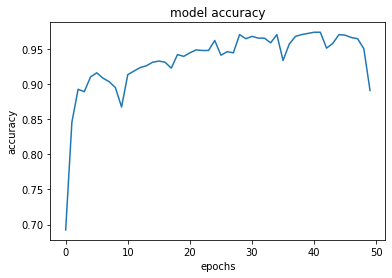

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

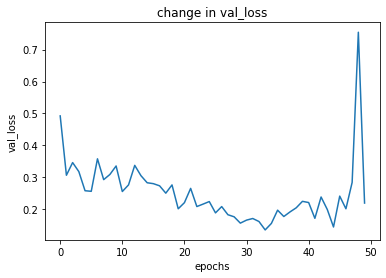

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('change in val_loss')
plt.ylabel('val_loss')
plt.xlabel('epochs')
plt.show()

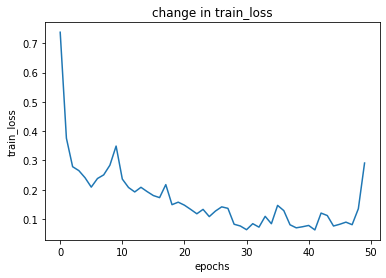

In [ ]:
plt.plot(history.history['loss'])
plt.title('change in train_loss')
plt.ylabel('train_loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
X_test = tensorflow.expand_dims(X_test, axis=2)

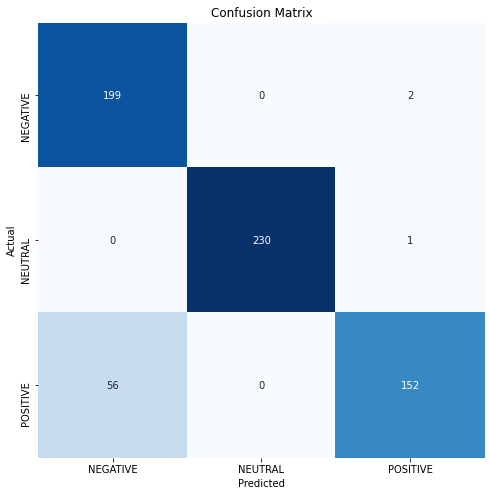

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.99      0.87       201
     NEUTRAL       1.00      1.00      1.00       231
    POSITIVE       0.98      0.73      0.84       208

    accuracy                           0.91       640
   macro avg       0.92      0.91      0.90       640
weighted avg       0.92      0.91      0.91       640



In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", clr)

In [ ]:
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
test_loss = model.evaluate(X_test, y_test, verbose=0)[0]
print("Test Accuracy = {}".format(test_acc))    
print("Test Loss = {}".format(test_loss))                 

Test Accuracy = 0.9078124761581421
Test Loss = 0.1989067792892456


In [ ]:
output = model.predict(X_test)

In [ ]:
output.shape

(640, 3)

In [ ]:
np.argmax(output, axis = 1)

array([0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1,